# Performance of baseline and transfer learning models
In this section we are visualizing the performance of the model measured as the concordance index across the model training iterations (epochs). 

In [1]:
import sys
sys.path.append('/root/capsule/environment/clinical_transformer/')

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [3]:
from xai.models.explainer import TransformerSurvivalEvaluator
from xai.models.explainer import compute_performance_folds

2024-05-28 18:34:48.674255: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-28 18:34:48.967818: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
from samecode.plot.pyplot import subplots
import seaborn as sns

In [5]:
import numpy as np 
import pandas as pd

In [23]:
experiments = [
    ['Survival', '', 'Baseline'],
    ['TransferLearningSurvival', 'model.E001000.h5', 'TransferLearning'],
]

res = []
exps = []
metric = 'epoch_sigmoid_concordance'

res = []
exps = []
for run_id, pretrained, label in experiments:
    exp = compute_performance_folds(
        Evaluator=TransformerSurvivalEvaluator,
        path='../results/runs/{}/{}/'.format(run_id, pretrained),
        label=label,
        metric=metric, 
        split='validation'
    )
    exps.append(exp)
    exp = exp.groupby(['epoch', 'Model']).agg({metric: [np.mean, np.std]}).reset_index()
    exp.columns=['epoch', 'Model', '{}_mean'.format(metric), '{}_std'.format(metric)]
    
    res.append(exp)

res = pd.concat(res)
exps = pd.concat(exps)

INFO	2024-05-28 18:38:06,525	No path found after ../results/runs/Survival///fold-0_id-0/validation/events.out.tfevents.1716921361.e376292c42ee.30677.1.v2
2024-05-28 18:38:06,532 - Evaluator - INFO - Baseline, Runs: 1, Heads: 2, Layers: 2, Embeddings: 128, Mode: survival, LR: 0.0001, TestSplit: 0.3, Features: 10(100%tile), Best Epoch (mean value): 72
INFO	2024-05-28 18:38:06,532	Baseline, Runs: 1, Heads: 2, Layers: 2, Embeddings: 128, Mode: survival, LR: 0.0001, TestSplit: 0.3, Features: 10(100%tile), Best Epoch (mean value): 72
INFO	2024-05-28 18:38:06,723	No path found after ../results/runs/TransferLearningSurvival/model.E001000.h5//fold-0_id-0/validation/events.out.tfevents.1716921459.e376292c42ee.27085.3.v2
2024-05-28 18:38:06,730 - Evaluator - INFO - TransferLearning, Runs: 1, Heads: 2, Layers: 2, Embeddings: 128, Mode: survival, LR: 0.0001, TestSplit: 0.3, Features: 10(100%tile), Best Epoch (mean value): 38
INFO	2024-05-28 18:38:06,730	TransferLearning, Runs: 1, Heads: 2, Layers: 

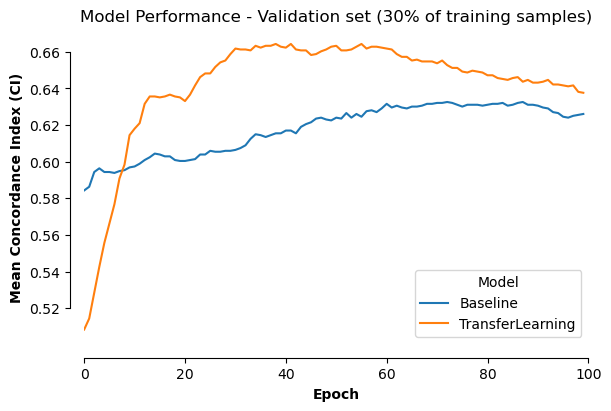

In [25]:
axs = subplots(cols=1, w=6, h=4)

res = res.groupby(['epoch', 'Model']).median().reset_index()
sns.lineplot(data=res, x='epoch', y='{}_mean'.format(metric), hue='Model', ax=axs[0], alpha=1);

axs[0].set_xlim([0, 100])
axs[0].set_xlabel('Epoch', weight='bold')
axs[0].set_ylabel('Mean Concordance Index (CI)', weight='bold')
# axs[0].set_ylim([0.5, 0.675])
axs[0].set_title('Model Performance - Validation set (30% of training samples)')
sns.despine(offset=10, trim=True);

Model with tranfer learning outperforms baseline model. 